In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
import sklearn
sklearn.__version__

'0.21.3'

In [3]:
df1 = pd.read_csv("data.txt", sep = "\t", encoding = "utf-8", header = None)
df1.columns = ['Link', 'Topic','Title', 'Content']

In [4]:
df1.describe()

,Link,Topic,Title,Content
count,151488,151487,151487,140813
unique,145259,5,137060,124129
top,https://vnexpress.net/khoa-hoc/tuong-lac-da-ba...,Thế giới,Năm câu đố tìm điểm bất hợp lý,Mời độc giả đặt câu hỏi tại đây.
freq,140,32806,141,595


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151488 entries, 0 to 151487
Data columns (total 4 columns):
Link       151488 non-null object
Topic      151487 non-null object
Title      151487 non-null object
Content    140813 non-null object
dtypes: object(4)
memory usage: 4.6+ MB


In [6]:
df1.head()

,Link,Topic,Title,Content
0,https://vnexpress.net/giao-duc/bon-cau-do-do-k...,Giáo dục,Bốn câu đố đo khả năng phản xạ,Câu 1: Một cậu bé 7 tuổi đứng từ cửa sổ tầng 6...
1,https://vnexpress.net/giao-duc/thay-giao-singa...,Giáo dục,Thầy giáo Singapore đi tù vì ấu dâm học sinh,"Ngày 22/4, tòa án ở Singapore tuyên phạt một g..."
2,https://vnexpress.net/giao-duc/de-xuat-giao-du...,Giáo dục,Đề xuất giáo dục phổ thông trong 11 năm,Tại hội nghị phản biện Luật Giáo dục (sửa đổi)...
3,https://vnexpress.net/giao-duc/phu-huynh-my-ke...,Giáo dục,Phụ huynh Mỹ kêu gọi sa thải giáo viên vì phê ...,"Chris Piland, sống ở bang Pennsylvania, Mỹ phẫ..."
4,https://vnexpress.net/giao-duc/ngoi-truong-dan...,Giáo dục,Ngôi trường dành riêng cho học sinh bị bắt nạt...,Nạn bắt nạt gây ảnh hưởng tiêu cực đến cuộc số...


y
Giáo dục     24996
Khoa học     26722
Pháp luật    31844
Thế giới     30739
Thời sự      26512
Name: X, dtype: int64

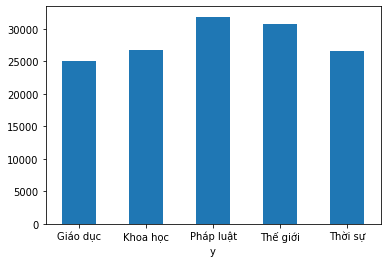

In [7]:
# XEM DỮ LIỆU TRƯỚC KHI XÓA CÁC DÒNG KHÔNG CÓ GIÁ TRỊ CONTENT
df = df1.copy()

df['X'] = df['Title'] + ". " + df['Content']
df['y'] = df['Topic']

df.drop(['Link', 'Title', 'Content', 'Topic'], axis=1, inplace=True)

s = df.groupby("y")["X"].count()
s.plot.bar(rot=0)
s

**_BƯỚC 01: PRE-PROSESSING DATA_**

In [8]:
df = df1.copy()

df = df.dropna() # xóa các dòng có giá trị thiếu
df = df.drop_duplicates() # Xóa các dòng có giá trị trùng 
df.drop(df[df['Content'].str.len() <= 50].index, inplace = True) # xóa các dòng có len(Content) <= 50 

In [9]:
df['X'] = df['Title'] + ". " + df['Content']
df['y'] = df['Topic']

df.drop(['Link', 'Title', 'Content', 'Topic'], axis=1, inplace=True)
df = df.drop_duplicates() # Xóa các dòng có giá trị trùng 

In [10]:
df.describe()

,X,y
count,122662,122662
unique,122662,5
top,39 người chết trên container có thể do bị ngạt...,Pháp luật
freq,1,30369


y
Giáo dục     20943
Khoa học     19019
Pháp luật    30369
Thế giới     28744
Thời sự      23587
Name: X, dtype: int64

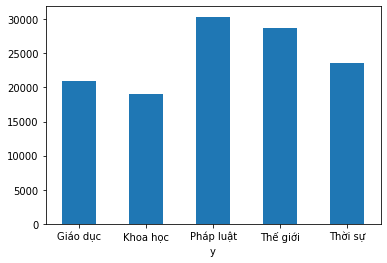

In [11]:
s = df.groupby("y")["X"].count()
s.plot.bar(rot=0)
s

In [12]:
# Tách thành 1 series là y và dataFrame X
y_sr = df["y"] 
X_df = df.drop("y", axis=1)

In [13]:
# Tách tập train, tập validation, tập test theo tỉ lệ 6:2:2
train_X_df, test_X_df, train_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.2, stratify = y_sr, random_state=0)

In [16]:
# Tách tập train, tập validation, tập test theo tỉ lệ 6:2:2
X_train, val_X_df, y_train, val_y_sr = train_test_split(train_X_df,train_y_sr, stratify = train_y_sr, random_state=0)

In [17]:
train_X_df['y'] = train_y_sr
val_X_df['y'] = val_y_sr
test_X_df['y'] = test_y_sr

In [18]:
train_X_df.to_csv("train.csv", sep = "\t", index = None)
val_X_df.to_csv("val.csv", sep = "\t", index = None)
test_X_df.to_csv("test.csv", sep = "\t", index = None)

In [19]:
# XEM DỮ LIỆU TẬP TRAIN
train_X_df.describe()

,X,y
count,98129,98129
unique,98129,5
top,Chuyên gia đọc khẩu hình hé lộ chủ đề đối thoạ...,Pháp luật
freq,1,24295


In [20]:
# XEM DỮ LIỆU TẬP VALIDATION
val_X_df.describe()

,X,y
count,24533,24533
unique,24533,5
top,Chuyên gia đọc khẩu hình hé lộ chủ đề đối thoạ...,Pháp luật
freq,1,6074


In [21]:
# XEM DỮ LIỆU TẬP TEST
test_X_df.describe()

,X,y
count,24533,24533
unique,24533,5
top,Hai nam sinh mất tích khi tắm biển Đà Nẵng. Kh...,Pháp luật
freq,1,6074
